In [63]:
import numpy as np
import qiskit
from sympy import Matrix

Here I would like to create a random $N$-qubits circuit with $N_{cx}$ c-nots and $N_{sq}$ single qubits gates.

I use this algorithm to create the circuit:

- extract $N_{cx}$ random numbers (control_qubits) in the range [0, $N$-qubits] to choose the control qubits of each c-not.

- extract 1 random in {control_qubits-1, control_qubits+1} unless the control is the last qubit or the first; in that case the targhet will be the upper qubit or the lower.

- extract $N_{sq}$ random couples in the ranges [0, $N$-qubits] and [0, $N_{cx}$]. Each couple rapresent the position of a single qubit gate.

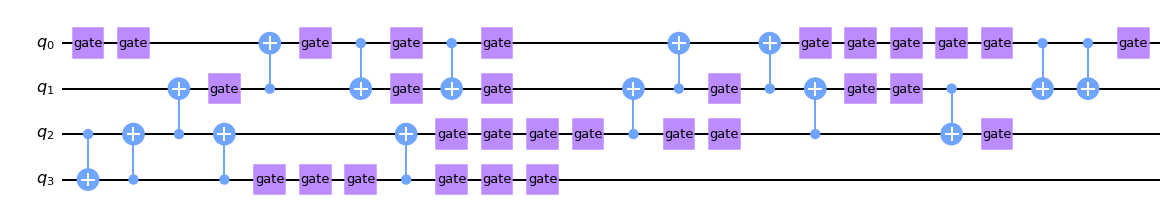

In [101]:
N_qubits = 4
N_cx = 15
N_sq = 30

def rand_target(val, N):
    if val==0:
        return 1
    if val==N-1:
        return N-2
    return np.random.choice([-1, +1])+val

def random_single_qubit_gate():
    basis_gates=["rz", "x", "sx", "Id"]
    angle = np.random.random()*2*np.pi
    random_gates = np.random.choice(basis_gates, replace=False, size=3)
    qr_aus = qiskit.QuantumRegister(1, name="q")
    qc_aus = qiskit.QuantumCircuit(qr_aus, name="gate")
    for gate in random_gates:
        if gate=="rz":
            qc_aus.rz(angle, qr_aus)
        if gate=="x":
            qc_aus.x(qr_aus)
        if gate=="sx":
            qc_aus.sx(qr_aus)
    return qc_aus

control_qubits = np.random.randint(N_qubits, size=N_cx)
target_qubits = np.array([rand_target(j, N_qubits)  for j in control_qubits])

single_positions = np.random.randint(N_cx+1, size=N_sq)
single_qubits = np.random.randint(N_qubits, size=N_sq)

qr = qiskit.QuantumRegister(N_qubits, name="q")
qc = qiskit.QuantumCircuit(qr, name="random_circuit")

j=0
for i in range(N_cx):
    for _ in range(list(single_positions).count(i)):
        qc.append(random_single_qubit_gate(), [qr[single_qubits[j]]])
        j+=1
    qc.cx(control_qubits[i], target_qubits[i])

for _ in range(list(single_positions).count(N_cx)):
    qc.append(random_single_qubit_gate(), [qr[single_qubits[j]]])
    j+=1

qc.draw(output="mpl")

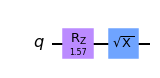

In [102]:
random_single_qubit_gate().draw(output="mpl")

Ideal final state:

In [117]:
matrix = np.array(qiskit.quantum_info.Operator(qc))
matrix[:,0]

array([ 0.41848082-0.21616483j, -0.18778813-0.11953562j,
        0.17291946-0.10612434j, -0.1528069 -0.12925919j,
       -0.2067165 -0.2311869j , -0.05747967+0.16441442j,
        0.0861602 +0.00895223j,  0.04166265-0.10778409j,
        0.07152621-0.05554771j,  0.01833497-0.03568043j,
        0.15807788-0.34286895j, -0.23928951+0.01373969j,
        0.28713391+0.06605709j, -0.00956035-0.07325764j,
       -0.35344907-0.06492165j,  0.07291572+0.25192844j])

Tomography and simulation on real device: